In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Function import Norm_sph_harmonics
from wavefunctions import R_4_3, Y_theta, Y_phi
from math import pi
from GraphFunction import prob_wt_cal
from random import uniform,choices

In [60]:
n = 4
l = 3
m = 3
a = 5.29e-11
r0 = 0
rm = 50*a
N_theta = 1
N_phi = 1

def mod_r(r):
    return R_4_3(r,a)

def mod_Y_theta(theta):
    return Y_theta(theta,l,m,N_theta)

def mod_Y_phi(phi):
    return Y_phi(phi,m,N_phi)

In [61]:
N_theta, N_phi = Norm_sph_harmonics(mod_Y_theta,mod_Y_phi,(0,pi),(0,2*pi))

In [62]:
parts = 30
wt_r,wt_theta,wt_phi = prob_wt_cal(mod_r,mod_Y_theta,mod_Y_phi,(r0,rm),(0,pi),(0,2*pi),parts)

In [63]:
dis_r = np.linspace(r0,rm,parts+1)[:-1]
dis_theta = np.linspace(0,pi,parts+1)[:-1]
dis_phi = np.linspace(0,2*pi,parts+1)[:-1]

itr = 20000
coord = np.zeros((1,3))
for i in range(itr):
    lucky_r = choices(dis_r,wt_r) + uniform(dis_r[0],dis_r[1])
    lucky_theta = choices(dis_theta,wt_theta) +uniform(dis_theta[0],dis_theta[1])
    lucky_phi = choices(dis_phi,wt_phi) +uniform(dis_phi[0],dis_phi[1])
    coord = np.concatenate((coord,np.array([[lucky_r,lucky_theta,lucky_phi]]).reshape(1,3)),axis=0)

coord = coord[1:,:]

In [64]:
n_coords = coord.shape[0]
cart_coord = np.zeros((n_coords,3))

cart_coord[:,0] = coord[:,0] * np.sin(coord[:,1]) * np.cos(coord[:,2])
cart_coord[:,1] = coord[:,0] * np.sin(coord[:,2]) * np.sin(coord[:,1])
cart_coord[:,2] = coord[:,0] * np.cos(coord[:,1]) 


In [65]:
XYcross = np.array([[0,0]])
YZcross = np.array([[0,0]])
ZXcross = np.array([[0,0]])
for i in range(n_coords):
    if -0.25e-9<cart_coord[i,2]<0.25e-9:
        XYcross = np.concatenate((XYcross,np.array([[cart_coord[i,0],cart_coord[i,1]]])),axis=0)
    if -0.25e-9<cart_coord[i,0]<0.25e-9:
        YZcross = np.concatenate((YZcross,np.array([[cart_coord[i,1],cart_coord[i,2]]])),axis=0)
    if -0.25e-9<cart_coord[i,1]<0.25e-9:
        ZXcross = np.concatenate((ZXcross,np.array([[cart_coord[i,2],cart_coord[i,0]]])),axis=0)





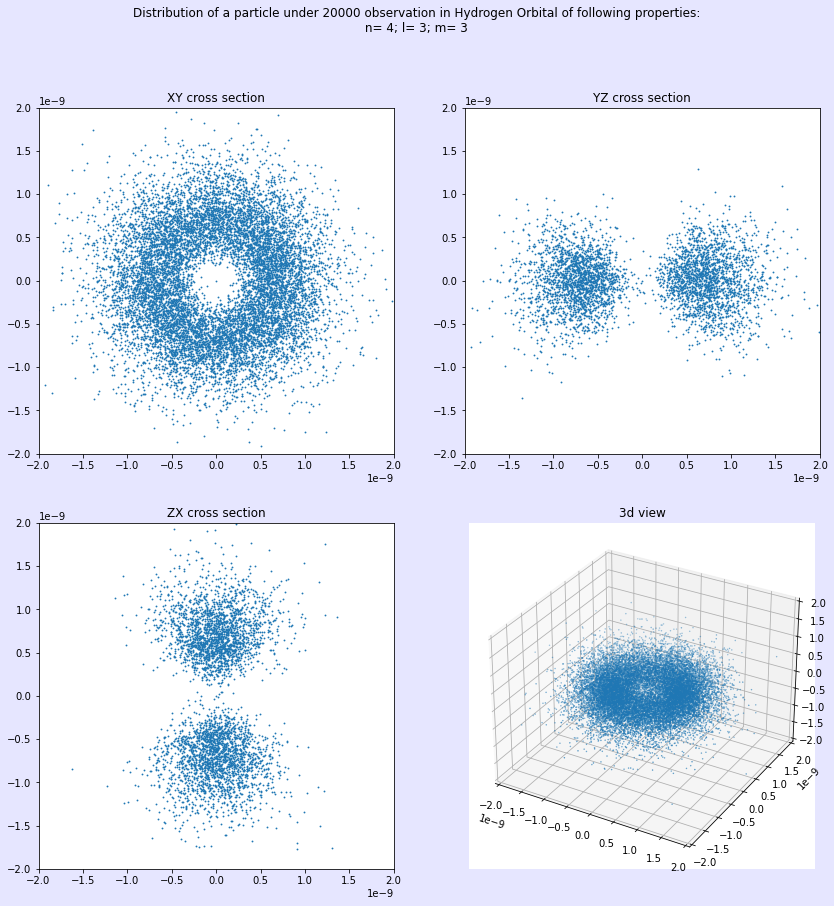

In [66]:
fig = plt.figure(figsize = (14,14),facecolor=(0.9,0.9,1))

fig.suptitle('Distribution of a particle under {} observation in Hydrogen Orbital of following properties:\n n= {}; l= {}; m= {} '.format(itr,n,l,m))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224,projection='3d')

glim = 2e-9

ax0.set_title('XY cross section')
ax0.scatter(XYcross[:,0],XYcross[:,1],s = 0.7)
ax0.set_xlim(-glim,glim)
ax0.set_ylim(-glim,glim)

ax1.set_title('YZ cross section')
ax1.scatter(YZcross[:,0],YZcross[:,1],s = 0.7)
ax1.set_xlim(-glim,glim)
ax1.set_ylim(-glim,glim)

ax2.set_title('ZX cross section')
ax2.scatter(ZXcross[:,0],ZXcross[:,1],s = 0.7)
ax2.set_xlim(-glim,glim)
ax2.set_ylim(-glim,glim)

ax3.set_title('3d view')
ax3.scatter(cart_coord[:,0],cart_coord[:,1],cart_coord[:,2], s = 0.2)
ax3.set_xlim(-glim,glim)
ax3.set_ylim(-glim,glim)
ax3.set_zlim(-glim,glim)

fig.savefig('4f_{}.png'.format(m))